In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from torch.utils.data import DataLoader
from utils.dataset import AirbusDataset, get_dataframes
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from utils.data_augmentation import CenterCrop, DualCompose, HorizontalFlip, RandomCrop, RandomLighting, Rotate, VerticalFlip
import numpy as np

In [2]:
df = get_dataframes()[0]
df

ImageId                                      EncodedPixels  \
0      000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...   
1      000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...   
2      000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...   
3      000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...   
4      000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...   
...              ...                                                ...   
77631  fff909871.jpg  441057 2 441825 4 442592 7 443360 9 444128 11 ...   
77632  fffcb6464.jpg  222782 4 223550 10 224318 14 225086 14 225854 ...   
77633  fffd924fb.jpg  110011 5 110779 5 111547 5 112315 5 113083 5 1...   
77634  fffd924fb.jpg  198440 8 199208 8 199976 8 200744 8 201512 8 2...   
77635  fffdd2377.jpg  333603 7 334359 19 335120 26 335888 26 336656 ...   

       counts  
0           1  
1           5  
2           5  
3           5  
4           5  
...       ...  
77631       1  
77632       1  
77633       2  
77634       2  
77635       1  

[77636 rows x 3 columns]

In [10]:
image_size = 384
image_size = 768
t = DualCompose([
        Rotate(20),
        RandomLighting(0.05, 0.05),
        HorizontalFlip(),
        VerticalFlip(),
        # RandomCrop((image_size,image_size,3))
        CenterCrop((image_size,image_size,3))
])

train_dataset = AirbusDataset(mode='train', transform=t)
dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False)

# Get a batch of images
images, masks = next(iter(dataloader))

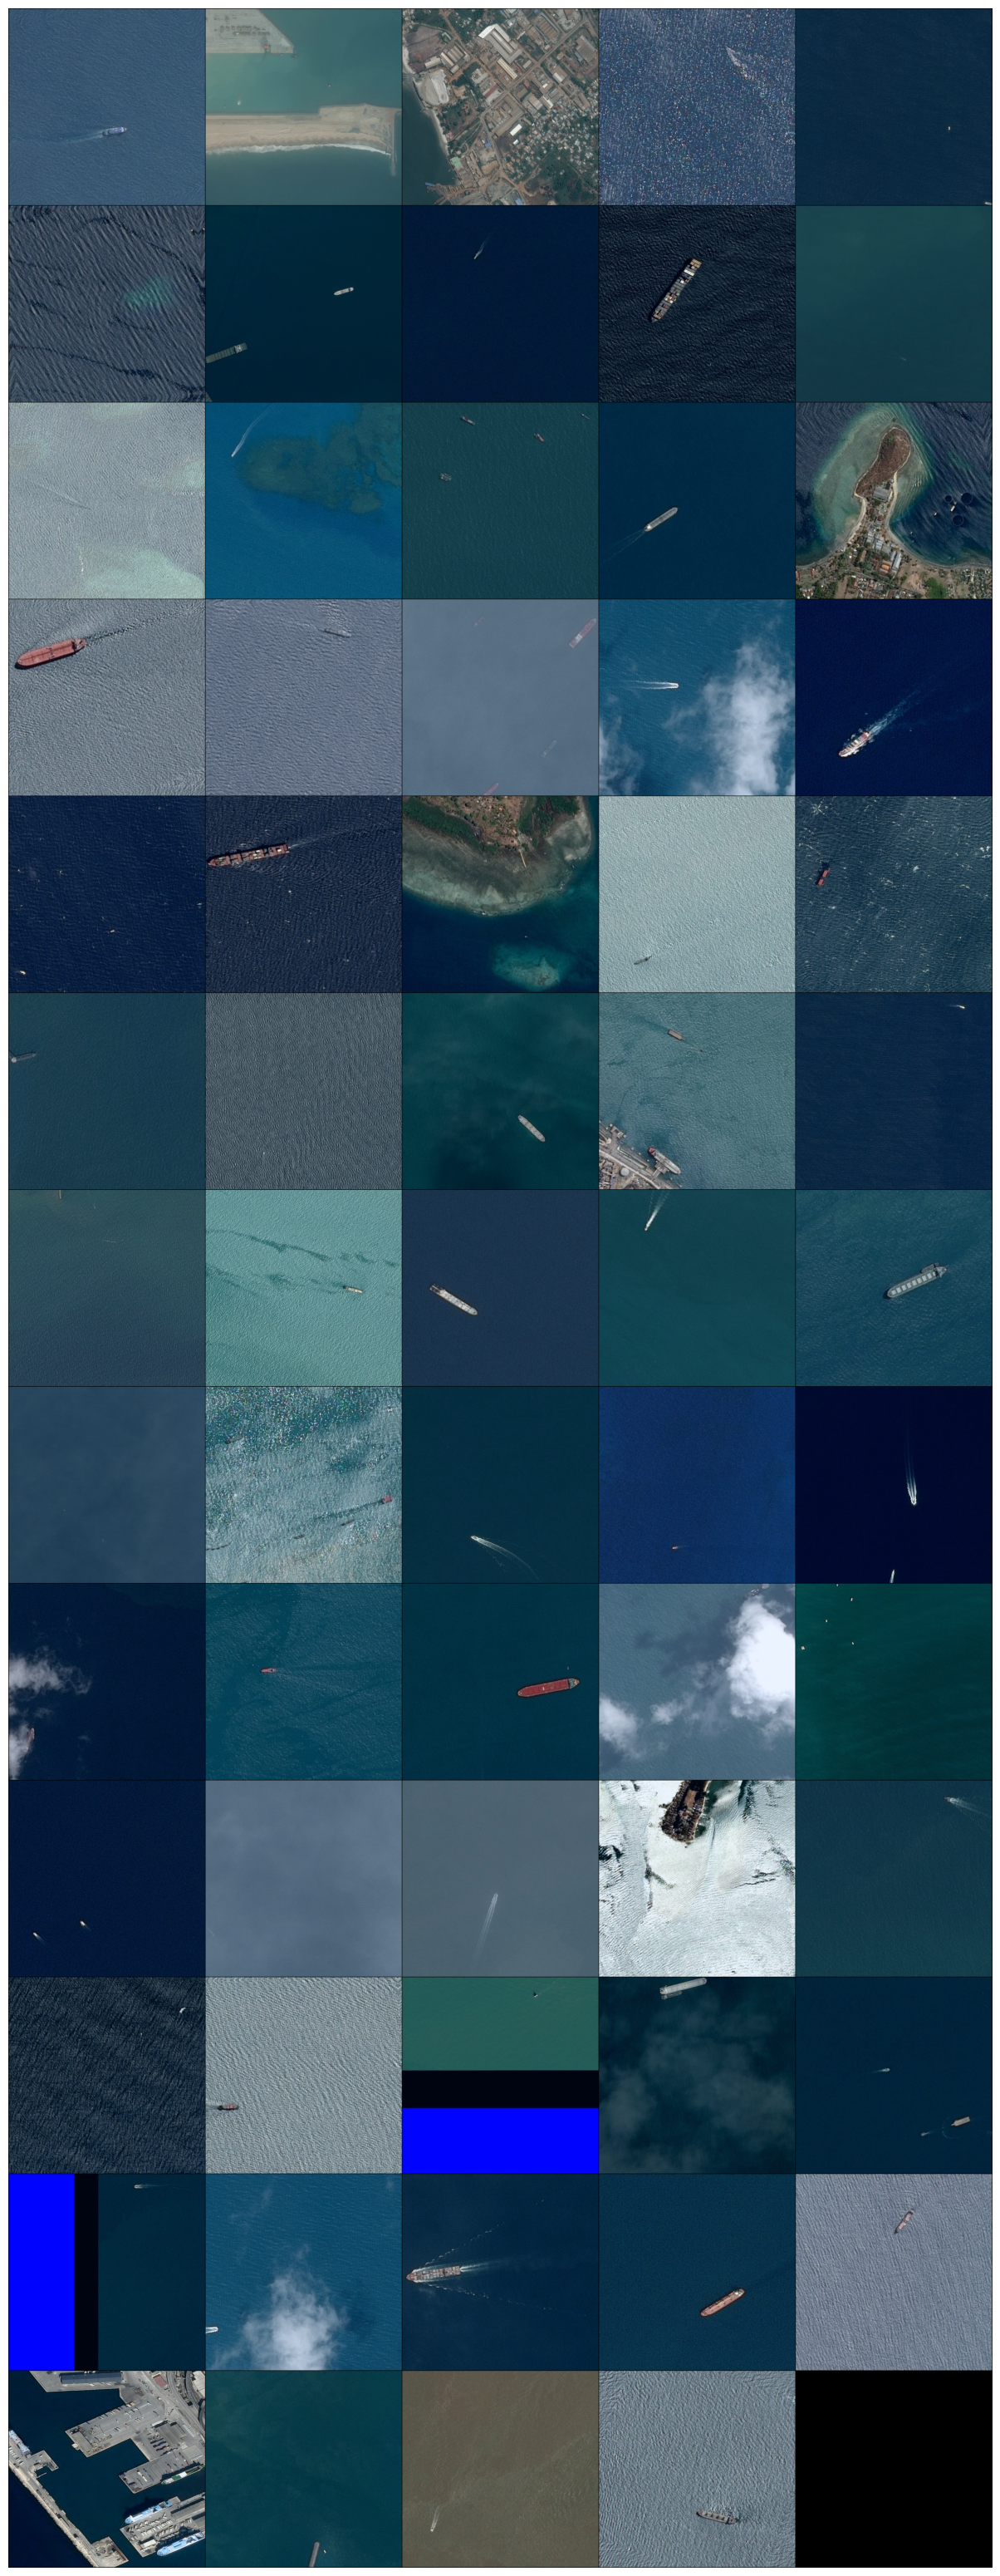

In [ ]:
# # Create a grid of images
grid = make_grid(images, nrow=5, normalize=True)

# Display the grid
plt.figure(figsize=(20, 40))
plt.imshow(grid.permute(1, 2, 0))  # Convert from CHW to HWC for display
plt.axis('off')
plt.show()